In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import LabelEncoder


import seaborn as sn
from pylab import rcParams      
rcParams['figure.figsize'] = 8, 8
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
#f_name=['target', 'id', 'data', 'query', 'user', 'description']

In [4]:
memes = pd.read_csv('Tweets.csv') #, index_col="id")

In [5]:
memes.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
memes.shape

(14640, 15)

In [7]:
memes.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [9]:
memes.tail(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [10]:
memes['Timestamp'] = pd.to_datetime(memes['tweet_created'])

In [11]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

In [12]:
memes.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,...,tweet_coord,tweet_created,tweet_location,user_timezone,Timestamp,Year,Month,Day,Hour,Weekday
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,...,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2015-02-24 11:35:52-08:00,2015,2,24,11,1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015-02-24 11:15:59-08:00,2015,2,24,11,1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015-02-24 11:15:48-08:00,2015,2,24,11,1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),2015-02-24 11:15:36-08:00,2015,2,24,11,1
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),2015-02-24 11:14:45-08:00,2015,2,24,11,1


In [13]:
memes['days_from_creation'] = (memes.Timestamp.max() - memes.Timestamp)/np.timedelta64(1, 'D')

А теперь для наших созданных переменных построим несколько гистограмм

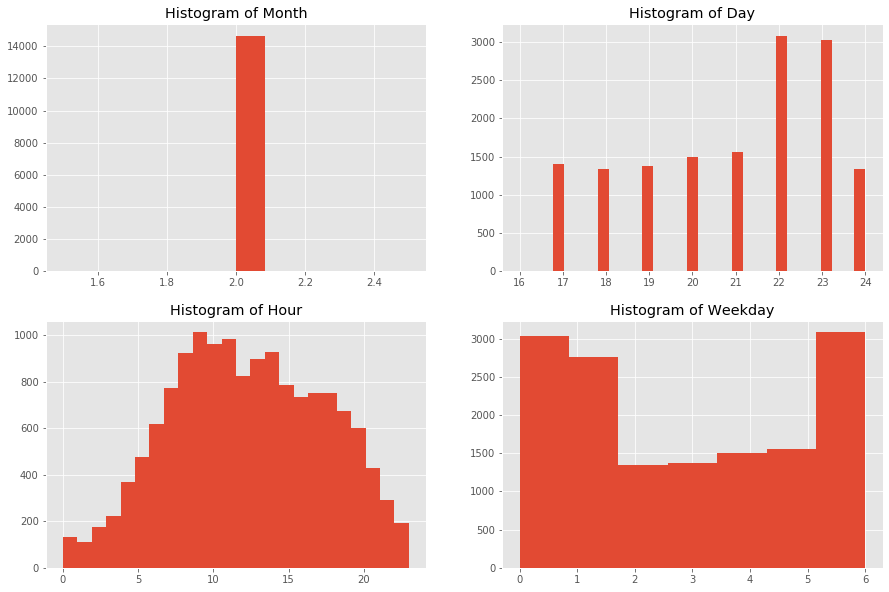

In [14]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(15,10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(memes[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

In [15]:
import nltk
from nltk.corpus import stopwords

In [16]:
stop = stopwords.words('english')
stemmer = nltk.stem.snowball.EnglishStemmer('english')

def data_Stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [17]:
"""
memes["airline"] = memes.tags.fillna("")+' '+\
                       memes.about.fillna("")+' '+\
                       memes.origin.fillna("")+' '+\
                       memes.other_text.fillna("")
                       """

'\nmemes["airline"] = memes.tags.fillna("")+\' \'+                       memes.about.fillna("")+\' \'+                       memes.origin.fillna("")+\' \'+                       memes.other_text.fillna("")\n                       '

In [18]:
memes.airline = memes.airline.apply(lambda x: x.lower().replace('unknown', ''))

In [19]:
memes.airline[4]

'virgin america'

In [20]:
data_Stemmer(memes.airline[4])

'virgin america'

In [21]:
memes.airline = memes.airline.apply(lambda x: data_Stemmer(x))

In [22]:
X = memes.airline
y = memes.tweet_id

Для TF-IDF попробуем использовать биграммы, а чтобы словарь не раздувался до неадекватных размеров, ограничим минимальную частоты содержания слов в документах 0.1%. То есть будем выкидывать такие слова и биграммы, которые встречаются реже, чем в 0.1% документов. 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words=stop, ngram_range=(1, 2), min_df=0.001, norm=None)

In [24]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.30, random_state=22)

In [25]:
Xtr_tfidf = tf_vectorizer.fit_transform(Xtr)
Xval_tfidf = tf_vectorizer.transform(Xval)
Xtr_tfidf.shape, Xval_tfidf.shape

((10248, 10), (4392, 10))

In [292]:
"""
def quantile(y):
    for interval in intervals:
        if y<=interval.right:
            return interval
            break
    return interval
    """

'\ndef quantile(y):\n    for interval in intervals:\n        if y<=interval.right:\n            return interval\n            break\n    return interval\n    '

In [293]:
from sklearn.linear_model import SGDClassifier, LogisticRegressionCV

In [294]:
logit_sgd = SGDClassifier(
    loss='log', 
    shuffle=True, 
    n_iter_no_change=10, 
    max_iter=100, 
    penalty='l2', 
    random_state=22
)

In [295]:
logit_sgd.fit(Xtr_tfidf, ytr)

print(accuracy_score(logit_sgd.predict(Xtr_tfidf), ytr))
print(accuracy_score(logit_sgd.predict(Xval_tfidf), yval))

print(classification_report(logit_sgd.predict(Xval_tfidf), yval))

0.0006830601092896175
0.0
                    precision    recall  f1-score   support

567591480085463040       0.00      0.00      0.00       0.0
567627253991735296       0.00      0.00      0.00       0.0
567630296783155203       0.00      0.00      0.00       0.0
567663136082513920       0.00      0.00      0.00       0.0
567670985403285504       0.00      0.00      0.00       0.0
567671602280923136       0.00      0.00      0.00       0.0
567676400933416960       0.00      0.00      0.00       0.0
567686845903826947       0.00      0.00      0.00       0.0
567688325276770306       0.00      0.00      0.00       0.0
567688411289755648       0.00      0.00      0.00       0.0
567690417265975296       0.00      0.00      0.00       0.0
567692251954827265       0.00      0.00      0.00       0.0
567695310860730369       0.00      0.00      0.00       0.0
567702414157824000       0.00      0.00      0.00       0.0
567703258425081857       0.00      0.00      0.00       0.0
5677043394482

In [296]:
print(len(X))

14640


In [297]:
print(len(y))

14640
